In [1]:
from ROOT import TFile,TTree,TCanvas,TH1F, gStyle, TLatex, gPad, TLegend, TLorentzVector, TH2F, TLine, TF1, TBox, RDataFrame, TPad, TF2, TStyle, THStack
import ROOT
import numpy as np
import awkward as awk
import uproot as up
import pandas as pd

Welcome to JupyROOT 6.22/06


$k_i = k_f - q$

In [30]:
MC = RDataFrame("tree_MC", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Files_Spring_24/July_2/file_0.root")
driver = RDataFrame("tree_driver", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_2_100_driver_old_R2.root")
# driver = RDataFrame("tree_driver", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_2_100_driver_new_R2.root")

In [31]:
tree_driver = up.open("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_2_100_driver_old_R2.root:tree_max")
# tree_driver = up.open("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_2_100_driver_new_R2.root:tree_max")
tree_MC = up.open("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Files_Spring_24/July_2/file_0.root:tree_maxmin")

In [32]:
driver_R0_hist_max = tree_driver["R0_hist_max"].array(library='np')[0]
driver_R1_hist_max = tree_driver["R1_hist_max"].array(library='np')[0]
driver_R2_hist_max = tree_driver["R2_hist_max"].array(library='np')[0]

driver_R0_hist_min = tree_driver["R0_hist_min"].array(library='np')[0]
driver_R1_hist_min = tree_driver["R1_hist_min"].array(library='np')[0]
driver_R2_hist_min = tree_driver["R2_hist_min"].array(library='np')[0]

MC_R0_hist_max = tree_MC["R0_max"].array(library='np')[0]
MC_R1_hist_max = tree_MC["R1_max"].array(library='np')[0]
MC_R2_hist_max = tree_MC["R2_max"].array(library='np')[0]

MC_R0_hist_min = tree_MC["R0_min"].array(library='np')[0]
MC_R1_hist_min = tree_MC["R1_min"].array(library='np')[0]
MC_R2_hist_min = tree_MC["R2_min"].array(library='np')[0]

In [33]:
nBins_MC = 1000
nBins_MC_R1 = 10000000
# Calculate common bin width
binWidth_R0 = MC_R0_hist_max / nBins_MC
binWidth_R1 = MC_R1_hist_max / nBins_MC_R1
binWidth_R2 = MC_R2_hist_max / nBins_MC

nBins_driver_R0 = int(driver_R0_hist_max // binWidth_R0)
nBins_driver_R1 = int(driver_R1_hist_max // binWidth_R1)
nBins_driver_R2 = int(driver_R2_hist_max // binWidth_R2)

In [34]:
MC_R1_hist_min

-21005.0871723319

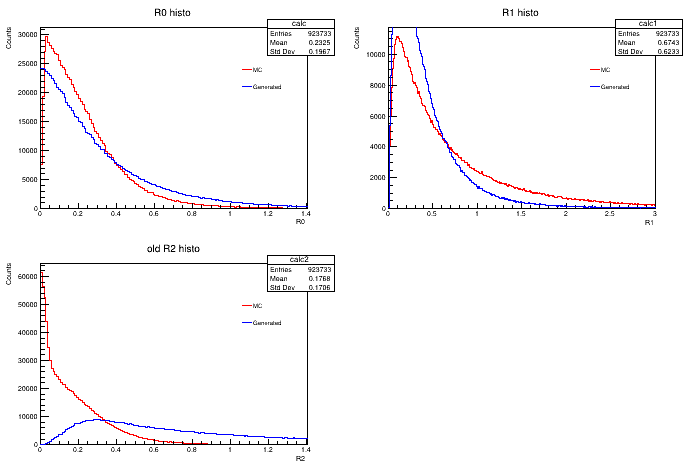

In [35]:
# Define histograms with common bin width
d = driver.Histo1D(("d", "R0 histo ;R0 ;Counts", nBins_driver_R0, 0, driver_R0_hist_max), "R0.R0_t")
d1 = driver.Histo1D(("d1","R1 histo ;R1 ;Counts",nBins_driver_R1,0,driver_R1_hist_max),"R1.R1_t")
d2 = driver.Histo1D(("d2","old R2 histo ;R2 ;Counts",nBins_driver_R2,0,driver_R2_hist_max),"R2.R2_t")


calc = MC.Histo1D(("calc", "R0 histo ;R0 ;Counts", nBins_MC, 0, MC_R0_hist_max), "R0")
calc1 = MC.Histo1D(("calc1","R1 histo ;R1 ;Counts",nBins_MC_R1,0,MC_R1_hist_max),"R1")
calc2 = MC.Histo1D(("calc2","old R2 histo;R2 ;Counts",nBins_MC,0,MC_R2_hist_max),"R2")

calc_dum = TH1F("","",1,0,1);
calc_dum.SetLineColor(2);
d_dum = TH1F("","",1,0,1);
d_dum.SetLineColor(4);
calc.SetLineColor(2)
d.SetLineColor(4)
calc1.SetLineColor(2)
d1.SetLineColor(4)
calc2.SetLineColor(2)
d2.SetLineColor(4)

legend = ROOT.TLegend (0.7 ,0.6 ,0.85 ,0.75)
legend.AddEntry(calc_dum, "MC" ,"l")
legend.AddEntry(d_dum, "Generated","l" )
legend.SetLineWidth(0)

calc.GetXaxis().SetRangeUser(0,1.4)
calc1.GetXaxis().SetRangeUser(0,3)
calc2.GetXaxis().SetRangeUser(0,1.4)
d1.GetXaxis().SetRangeUser(0,3)

c = TCanvas("c","c")
c.Divide(2,2)
c.cd(1)
calc.Draw("histo")
d.Draw("same")
legend.Draw("same")
c.cd(2)

calc1.Draw("histo")
d1.Draw("same")

legend.Draw("same")
c.cd(3)
calc2.Draw("histo")
d2.Draw("same")
legend.Draw("same")
c.Draw()
c.Print("./Histos/Ratios-oldR2.pdf")

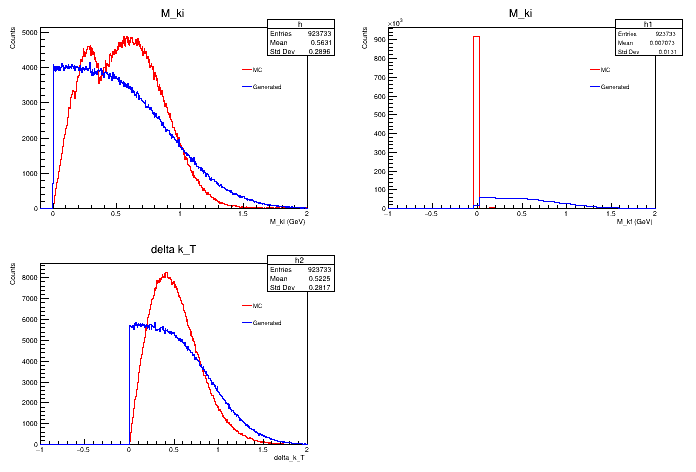

In [36]:
d = RDataFrame("tree_test", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Files_Spring_24/July_2/file_0.root")
#Histogams for plotting R1 values
h = d.Histo1D(("h","M_ki ;M_ki (GeV) ;Counts",500,-0.1,2),"M_ki")
h1 = d.Histo1D(("h1","M_ki ;M_kf (GeV) ;Counts",50,-1,2),"M_kf")
h2 = d.Histo1D(("h2","delta k_T;delta_k_T ;Counts",500,-1,2),"delta_k_T")
r = d.Histo1D(("r",";r_M_ki (GeV) ;Counts",500,-0.1,2),"r_M_ki")
r1 = d.Histo1D(("r1",";r_M_kf (GeV) ;Counts",50,-1,2),"r_M_kf")
r2 = d.Histo1D(("r2",";r_delta_k_T ;Counts",500,-1,2),"r_delta_k_T")
# h3 = d.Histo1D(("h3",";ki_y ;Counts",1000,-5,5),"ki_y")
# h4 = d.Histo1D(("h4",";ki_z ;Counts",1000,-5,5),"ki_z")
# h5 = d.Histo1D(("h5",";kf_x ;Counts",1000,-5,5),"kf_x")
# h6 = d.Histo1D(("h6",";kf_y ;Counts",1000,-5,5),"kf_y")
# h7 = d.Histo1D(("h7",";kf_z ;Counts",1000,-5,5),"kf_z")

h_dum = TH1F("","",1,0,1);
h_dum.SetLineColor(2);
r_dum = TH1F("","",1,0,1);
r_dum.SetLineColor(4);

h.SetLineColor(2)
r.SetLineColor(4)
h1.SetLineColor(2)
r1.SetLineColor(4)
h2.SetLineColor(2)
r2.SetLineColor(4)

legend = ROOT.TLegend (0.7 ,0.6 ,0.85 ,0.75)
legend.AddEntry(h_dum, "MC" ,"l")
legend.AddEntry(r_dum, "Generated","l" )
legend.SetLineWidth(0)
c = TCanvas("c","c")
c.Divide(2,2)
c.cd(1)
h.Draw("histo")
r.Draw("same")
legend.Draw("same")
c.cd(2)
h1.Draw("histo")
r1.Draw("same")
legend.Draw("same")
c.cd(3)
h2.Draw("histo")
r2.Draw("same")
legend.Draw("same")
# c.cd(4)
# h5.Draw("histo")
# c.cd(5)
# h3.Draw("histo")
# c.cd(6)
# h6.Draw("histo")
# c.cd(7)
# h4.Draw("histo")
# c.cd(8)
# h7.Draw("histo")
c.Draw()
c.Print("./Histos/partons_July_2.pdf")

In [ ]:
'''
h1 = d.Histo1D(("h1",";R1breit ;Counts", 1000, -5, 5), "R1breit")
h2 = d.Histo1D(("h2",";R1lab ;Counts", 1000, -5, 5), "R1lab")
h3 = d.Histo1D(("h3",";R1num gN ;Counts", 1000, -5, 5), "R1num")
h6 = d.Histo1D(("h4",";R1denom gN ;Counts", 1000, -5, 5), "R1denom")
h5 = d.Histo1D(("h5",";R1num lab ;Counts", 1000, -5, 5), "R1num_lab")
# h6 = d.Histo1D(("h6",";Mx ;Counts", 1000, 0, 3), "Mx")
h8 = d.Histo1D(("h6",";R1denom lab ;Counts", 1000, -5, 5), "R1denom_lab")
h4 = d.Histo1D(("h7",";R1num Breit;Counts", 1000, -5, 5), "R1num_Breit")
h7 = d.Histo1D(("h8",";R1denom Breit;Counts", 1000, -5, 5),"R1denom_Breit")
'''

In [13]:
e_i_energy = 10.6
p_i_energy = 0.9383
q_energy = 7.3918
e_f_energy = 3.2082
k_f_energy = 6.1048
diquark_energy = 1.1031
initial = e_i_energy + p_i_energy
final = e_f_energy + k_f_energy + diquark_energy + 1.8168
print(final - initial)

0.6946000000000012
